In [2]:
#Allow output from every line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# AL 2010-2019 Cy Young Award Winners
AL2010 = pd.read_csv("Felix2010.csv")
AL2011 = pd.read_csv("JV2011.csv")
AL2012 = pd.read_csv("Price2012.csv")
AL2013 = pd.read_csv("Max2013.csv")
AL2014 = pd.read_csv("Kluber2014.csv")
AL2015 = pd.read_csv("Keuchel2015.csv")
AL2016 = pd.read_csv("Porcello2016.csv")
AL2017 = pd.read_csv("Kluber2017.csv")
AL2018 = pd.read_csv("Snell2018.csv")
AL2019 = pd.read_csv("JV2019.csv")

AL2010['Name'] = "Felix Hernandez"
AL2011['Name'] = "Justin Verlander"
AL2012['Name'] = "David Price"
AL2013['Name'] = "Max Scherzer"
AL2014['Name'] = "Corey Kluber"
AL2015['Name'] = "Dallas Keuchel"
AL2016['Name'] = "Rick Porcello"
AL2017['Name'] = "Corey Kluber"
AL2018['Name'] = "Blake Snell"
AL2019['Name'] = "Justin Verlander"

In [7]:
AL_CY_Winners = pd.concat([AL2010,AL2011,AL2012,AL2013,AL2014,AL2015,AL2016,AL2017,AL2018,AL2019])
AL_CY_Winners.to_csv("AL2010-2019CyYoungWinners.csv")

In [8]:
AL_CY_Winners

,Season,Age,Team,Lg,WAR,W,L,W-L%,ERA,G,...,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/BB,Awards,Name
0,2010,24,SEA,AL,7.2,13,12,0.520,2.27,34,...,174,3.04,1.057,7.0,0.6,2.5,8.4,3.31,CYA-1MVP-16,Felix Hernandez
0,2011,28,DET,AL,8.6,24,5,0.828,2.40,34,...,172,2.99,0.920,6.2,0.9,2.0,9.0,4.39,ASCYA-1MVP-1,Justin Verlander
0,2012,26,TBR,AL,6.6,20,5,0.800,2.56,31,...,150,3.05,1.100,7.4,0.7,2.5,8.7,3.47,ASCYA-1MVP-12,David Price
0,2013,28,DET,AL,6.5,21,3,0.875,2.90,32,...,144,2.74,0.970,6.4,0.8,2.4,10.1,4.29,ASCYA-1MVP-12,Max Scherzer
0,2014,28,CLE,AL,8.1,18,9,0.667,2.44,34,...,160,2.35,1.095,7.9,0.5,1.9,10.3,5.27,CYA-1MVP-11,Corey Kluber
0,2015,27,HOU,AL,6.5,20,8,0.714,2.48,33,...,157,2.91,1.017,7.2,0.7,2.0,8.4,4.24,ASCYA-1MVP-5GG,Dallas Keuchel
0,2016,27,BOS,AL,4.7,22,4,0.846,3.15,33,...,142,3.40,1.009,7.8,0.9,1.3,7.6,5.91,CYA-1,Rick Porcello
0,2017,31,CLE,AL,7.9,18,4,0.818,2.25,29,...,202,2.50,0.869,6.2,0.9,1.6,11.7,7.36,ASCYA-1MVP-7,Corey Kluber
0,2018,25,TBR,AL,7.1,21,5,0.808,1.89,31,...,217,2.94,0.974,5.6,0.8,3.2,11.0,3.45,ASCYA-1MVP-9,Blake Snell
0,2019,36,HOU,AL,7.4,21,6,0.778,2.58,34,...,179,3.27,0.803,5.5,1.5,1.7,12.1,7.14,ASCYA-1MVP-11,Justin Verlander


In [9]:
AL_Metrics = AL_CY_Winners[['Season','SO','BB','HR']].groupby('Season').sum()

C:\Users\dervi\AppData\Local\Temp\ipykernel_9936\1894262492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AL_Metrics_Plot['Name and Season'] = AL_CY_Winners['Name'] + AL_CY_Winners['Season'].astype(str)


<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='Name and Season', ylabel='Value'>

Text(0.5, 1.0, '2010-2019 AL Cy Young Moneyball Statistics')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Felix Hernandez2010'),
  Text(1, 0, 'Justin Verlander2011'),
  Text(2, 0, 'David Price2012'),
  Text(3, 0, 'Max Scherzer2013'),
  Text(4, 0, 'Corey Kluber2014'),
  Text(5, 0, 'Dallas Keuchel2015'),
  Text(6, 0, 'Rick Porcello2016'),
  Text(7, 0, 'Corey Kluber2017'),
  Text(8, 0, 'Blake Snell2018'),
  Text(9, 0, 'Justin Verlander2019')])

Text(0.5, 0, 'Name and Season')

Text(0, 0.5, 'Value')

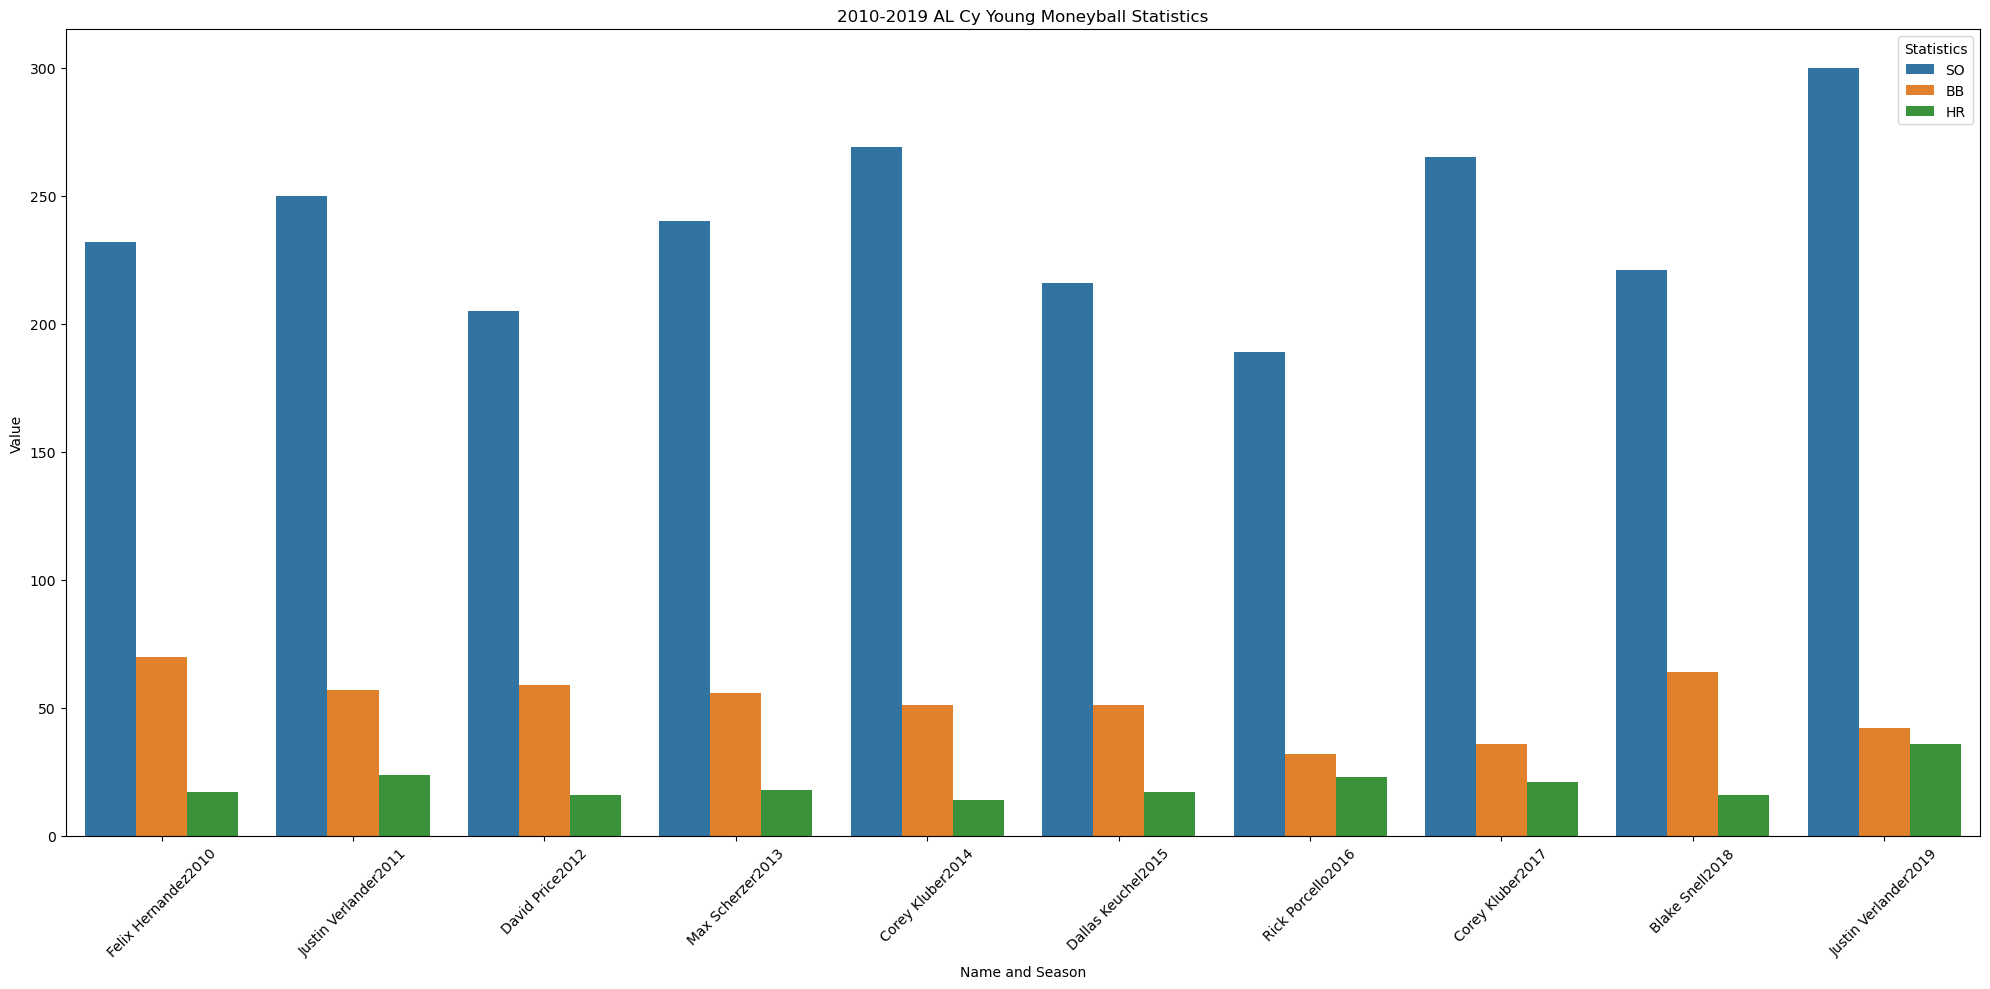

In [10]:
AL_Metrics_Plot = AL_CY_Winners[['Name','Season','SO','BB','HR']]
AL_Metrics_Plot['Name and Season'] = AL_CY_Winners['Name'] + AL_CY_Winners['Season'].astype(str)
AL_Metrics_Plot_Melted = AL_Metrics_Plot.melt(id_vars=['Name and Season'], value_vars=['SO','BB','HR'], var_name='Statistic', value_name ='Value')
plt.figure(figsize=(20,10))

sns.barplot(data=AL_Metrics_Plot_Melted, x = 'Name and Season', y='Value', hue='Statistic', dodge=True)
plt.title("2010-2019 AL Cy Young Moneyball Statistics")
plt.xticks(rotation=45)
plt.xlabel("Name and Season")
plt.ylabel("Value")
plt.legend(title="Statistics", loc = 'upper right')

plt.tight_layout()
plt.savefig("2010-2019 AL Cy Young Moneyball Statistics.pdf")
plt.show()

In [3]:
# NL 2010-2019 Cy Young Award Winners
NL2010 = pd.read_csv("Roy2010.csv")
NL2011 = pd.read_csv("Kershaw2011.csv")
NL2012 = pd.read_csv("Dickey2012.csv")
NL2013 = pd.read_csv("Kershaw2013.csv")
NL2014 = pd.read_csv("Kershaw2014.csv")
NL2015 = pd.read_csv("Arrieta2015.csv")
NL2016 = pd.read_csv("Max2016.csv")
NL2017 = pd.read_csv("Max2017.csv")
NL2018 = pd.read_csv("deGrom2018.csv")
NL2019 = pd.read_csv("deGrom2019.csv")

NL2010['Name'] = "Roy Halladay"
NL2011['Name'] = "Clayton Kershaw"
NL2012['Name'] = "R.A Dickey"
NL2013['Name'] = "Clayton Kershaw"
NL2014['Name'] = "Clayton Kershaw"
NL2015['Name'] = "Jake Arrieta"
NL2016['Name'] = "Max Scherzer"
NL2017['Name'] = "Max Scherzer"
NL2018['Name'] = "Jacob deGrom"
NL2019['Name'] = "Jacob deGrom"

In [11]:
NL_CY_Winners = pd.concat([NL2010,NL2011,NL2012,NL2013,NL2014,NL2015,NL2016,NL2017,NL2018,NL2019])
NL_CY_Winners.to_csv("NL2010-2019CyYoungWinners.csv")

In [12]:
NL_CY_Winners

,Season,Age,Team,Lg,WAR,W,L,W-L%,ERA,G,...,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/BB,Awards,Name
0,2010,33,PHI,NL,8.5,21,10,0.677,2.44,33,...,167,3.01,1.041,8.3,0.9,1.1,7.9,7.30,ASCYA-1MVP-6,Roy Halladay
0,2011,23,LAD,NL,6.8,21,5,0.808,2.28,33,...,161,2.47,0.977,6.7,0.6,2.1,9.6,4.59,ASCYA-1MVP-12GG,Clayton Kershaw
0,2012,37,NYM,NL,5.7,20,6,0.769,2.73,34,...,139,3.27,1.053,7.4,0.9,2.1,8.9,4.26,ASCYA-1MVP-14,R.A Dickey
0,2013,25,LAD,NL,8.1,16,9,0.640,1.83,33,...,194,2.39,0.915,6.3,0.4,2.0,8.8,4.46,ASCYA-1MVP-7,Clayton Kershaw
0,2014,26,LAD,NL,7.7,21,3,0.875,1.77,27,...,197,1.81,0.857,6.3,0.4,1.4,10.8,7.71,ASCYA-1MVP-1,Clayton Kershaw
0,2015,29,CHC,NL,8.3,22,6,0.786,1.77,33,...,215,2.35,0.865,5.9,0.4,1.9,9.3,4.92,CYA-1MVP-6,Jake Arrieta
0,2016,31,WSN,NL,6.2,20,7,0.741,2.96,34,...,144,3.24,0.968,6.5,1.2,2.2,11.2,5.07,ASCYA-1MVP-10,Max Scherzer
0,2017,32,WSN,NL,7.2,16,6,0.727,2.51,31,...,178,2.90,0.902,5.7,1.0,2.5,12.0,4.87,ASCYA-1MVP-10,Max Scherzer
0,2018,30,NYM,NL,9.5,10,9,0.526,1.70,32,...,218,1.98,0.912,6.3,0.4,1.9,11.2,5.85,ASCYA-1MVP-5,Jacob deGrom
0,2019,31,NYM,NL,7.2,11,8,0.579,2.43,32,...,169,2.67,0.971,6.8,0.8,1.9,11.3,5.80,ASCYA-1MVP-10,Jacob deGrom


In [15]:
NL_Metrics = NL_CY_Winners[['Name','Season','SO','BB','HR']].groupby('Season').sum()

C:\Users\dervi\AppData\Local\Temp\ipykernel_9936\553210512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NL_Metrics_Plot['Name and Season'] = NL_CY_Winners['Name'] + NL_CY_Winners['Season'].astype(str)


<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='Name and Season', ylabel='Value'>

Text(0.5, 1.0, '2010-2019 NL Cy Young Moneyball Statistics')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Roy Halladay2010'),
  Text(1, 0, 'Clayton Kershaw2011'),
  Text(2, 0, 'R.A Dickey2012'),
  Text(3, 0, 'Clayton Kershaw2013'),
  Text(4, 0, 'Clayton Kershaw2014'),
  Text(5, 0, 'Jake Arrieta2015'),
  Text(6, 0, 'Max Scherzer2016'),
  Text(7, 0, 'Max Scherzer2017'),
  Text(8, 0, 'Jacob deGrom2018'),
  Text(9, 0, 'Jacob deGrom2019')])

Text(0.5, 0, 'Name and Season')

Text(0, 0.5, 'Value')

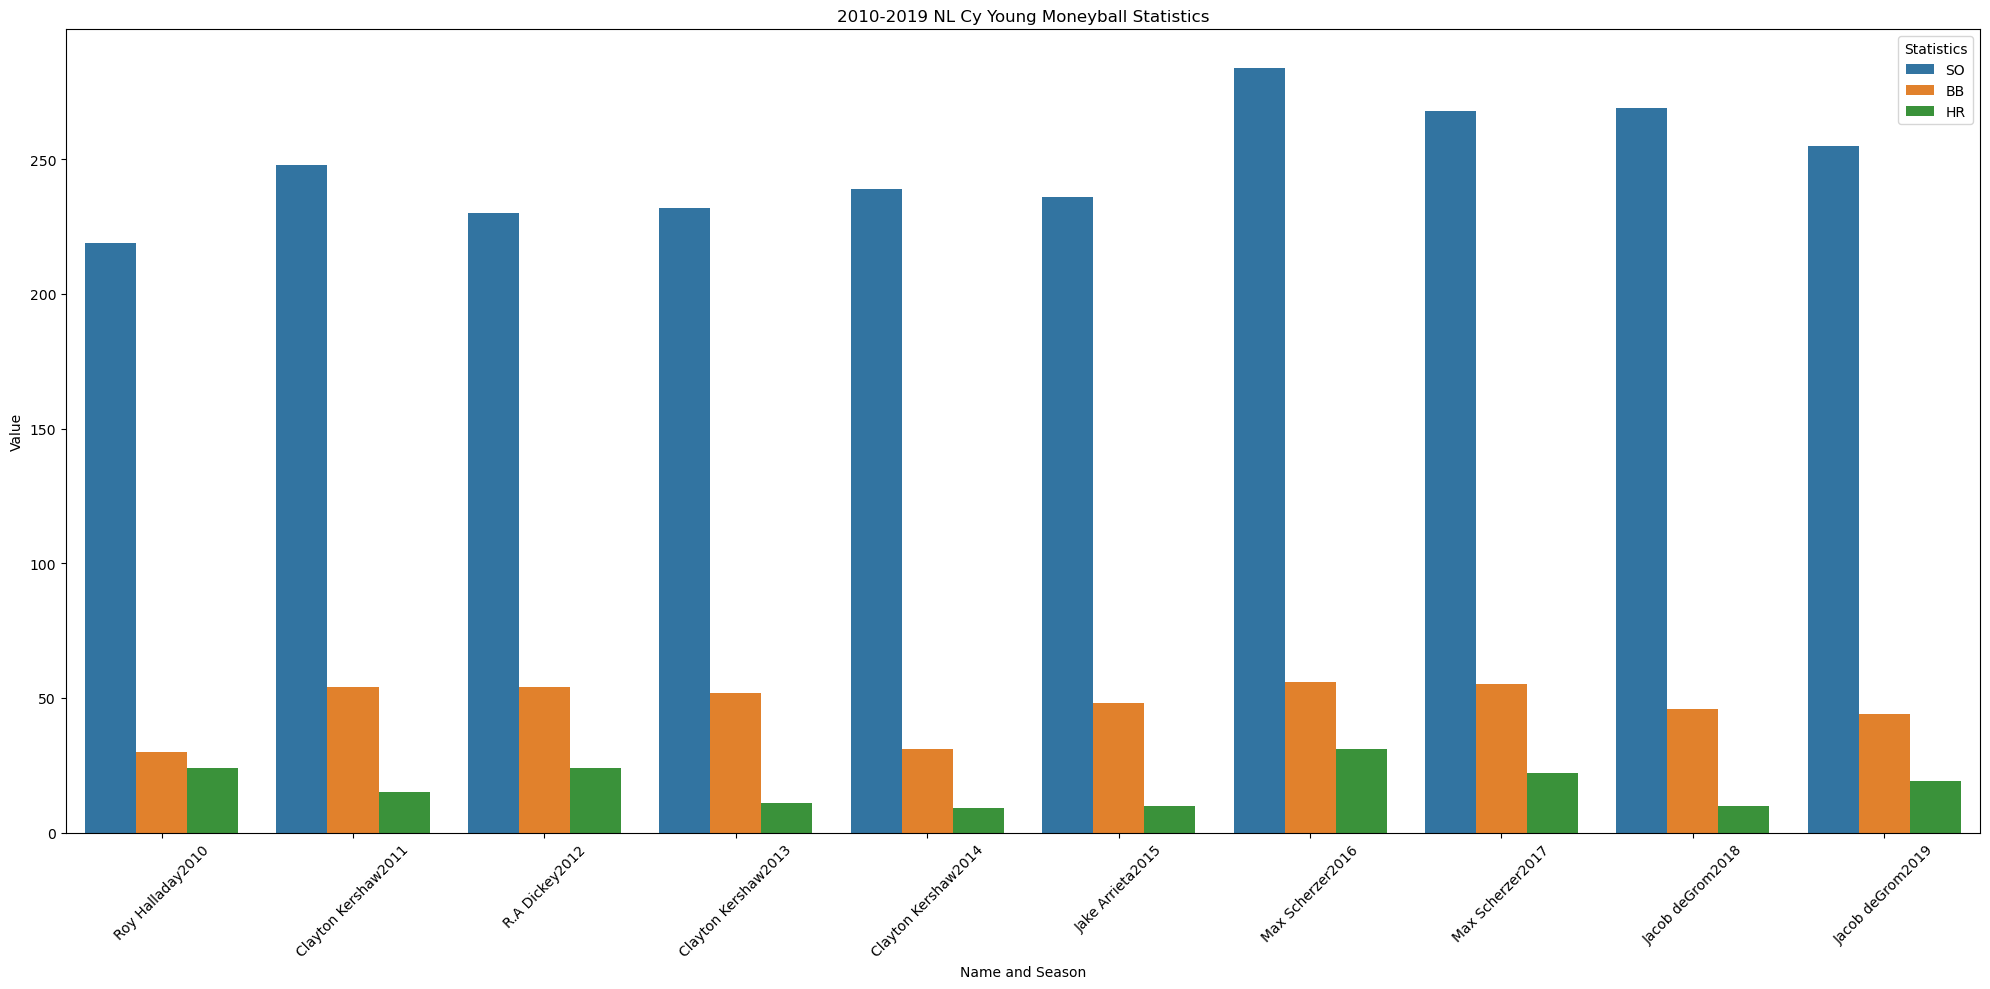

In [18]:
NL_Metrics_Plot = NL_CY_Winners[['Name','Season','SO','BB','HR']]
NL_Metrics_Plot['Name and Season'] = NL_CY_Winners['Name'] + NL_CY_Winners['Season'].astype(str)
NL_Metrics_Plot_Melted = NL_Metrics_Plot.melt(id_vars=['Name and Season'], value_vars=['SO','BB','HR'], var_name='Statistic', value_name='Value')
plt.figure(figsize=(20,10))

sns.barplot(data=NL_Metrics_Plot_Melted, x = 'Name and Season', y='Value', hue='Statistic', dodge=True)
plt.title("2010-2019 NL Cy Young Moneyball Statistics")
plt.xticks(rotation=45)
plt.xlabel("Name and Season")
plt.ylabel("Value")
plt.legend(title="Statistics", loc= 'upper right')

plt.tight_layout()
plt.savefig("2010-2019 NL Cy Young Moneyball Statistics.pdf")
plt.show()